In [1]:
#!module unload python/3.6.5

In [2]:
#!module load pythonconda3/4.5.4

In [1]:
# usual packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import h5py

In [2]:
# machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,Imputer

from keras.models import Sequential
from keras.layers import Dense

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (/cosma/local/pythonconda3/2020-02/lib/python3.7/site-packages/sklearn/preprocessing/__init__.py)

# NEURAL NETWORK

## Read lightcone

In [6]:
lightcone = h5py.File('/data/dega2/dc-manz2/LightOut/data/lc5.field1.63.hdf5','r') 

In [7]:
# list of properties available in the lightcone
prop = list(lightcone['Data'].keys())
#prop

In [8]:
# name of apparent magnitude (40 NB + 5 BB) 
#--> This are the names of the columns meant to be the input of the NN
app = []
for i in range(len(prop)):
    if ('app' in prop[i]):
        app.append(prop[i])
#app

In [9]:
# name of apparent magnitude (40 NB + 5 BB) 
#--> This are the names of the columns meant to be the input of the NN
app_NB = []
for i in range(len(prop)):
    if ('app' in prop[i])and('SDSS'not in prop[i]):
        app_NB.append(prop[i])

In [10]:
len(app_NB)

40

# Formatting input and output

In [11]:
input_mags = []
for i in range(len(app)):
    input_mags.append(np.array(lightcone['Data'][app[i]][()]))
input_mags = np.array(input_mags).T

In [12]:
input_mags_NB = []
for i in range(len(app_NB)):
    input_mags_NB.append(np.array(lightcone['Data'][app_NB[i]][()]))
input_mags_NB = np.array(input_mags_NB).T

In [13]:
len(lightcone['Data']['GalaxyID'])

68501

In [14]:
len(input_mags)

68501

In [15]:
output_z = np.array(lightcone['Data']['z_obs'])

# Normalisation

In [16]:
scaler = StandardScaler()

#this find the parameters to be used for normalisation
print(scaler.fit(input_mags))

# This actually normalise the data
print(scaler.transform(input_mags))

StandardScaler(copy=True, with_mean=True, with_std=True)
[[-0.2207775  -0.14841764 -0.10851052 ...  0.41516355 -0.77343804
   0.24731995]
 [ 0.1376481   0.22620726  0.27096376 ...  0.6401033  -0.4128331
   0.30302995]
 [ 0.14773262  0.21202101  0.24641588 ...  0.789629   -0.49756002
   0.7028056 ]
 ...
 [-2.172871   -2.1511066  -2.1216338  ... -1.650464   -1.7731131
  -1.1891433 ]
 [-3.5267313  -3.5447342  -3.5558164  ... -3.4408553  -2.673647
  -3.3098652 ]
 [-3.5263708  -3.520699   -3.5088756  ... -3.216873   -2.9226344
  -2.925575  ]]


In [17]:
input_mags_norm = scaler.transform(input_mags)

In [18]:
scaler = StandardScaler()
scaler.fit(input_mags_NB)
input_mags_norm_NB = scaler.transform(input_mags_NB)

# Let's split the sample in training and test

In [19]:
# The sklearn function train_test_split is just needed 
# to split the data in two part that we will 
# use as training and test sample.
input_train_lc,input_test_lc, output_train_lc, output_test_lc = train_test_split(input_mags_norm_NB, output_z, test_size=0.2)



In [20]:
# test_size controls how the sample is splitted
print ("training sample size: ",len(input_train_lc))
print ("test sample size: ",len(input_test_lc))
print ("train + test = ", len(input_train_lc)+len(input_test_lc))
print ("train / sample =", round(float(len(input_train_lc))/float(len(input_mags)),1))
print ("test / sample =", round(float(len(input_test_lc))/float(len(input_mags)),1))

training sample size:  54800
test sample size:  13701
train + test =  68501
train / sample = 0.8
test / sample = 0.2


## Create the NN model

In [21]:
model_lc = Sequential()
#create a network with 3 layers (we don't count the input one)
# in the input layer we choose a number of neurons (50) greater than the number of variables (40)
# remember to change the  number of variable if you change the input columns
model_lc.add(Dense(50,input_dim=40,activation='relu'))
model_lc.add(Dense(20,activation='relu'))
model_lc.add(Dense(10,activation='relu'))
# it's important to choose a linear activation function for the output layer
# as we are trying to predict real numbers and we are not classifying objects
model_lc.add(Dense(1,activation='linear'))

In [22]:
#compiling the model before running it
model_lc.compile(loss='mean_absolute_error', optimizer='adam')

## Training the network

In [23]:
# epochs controls the number of iteration where the 
# algorithm optimizes the weights that it assigns to each variable
# The loss function evaluate how good 
# is the redshift prediction using 
# the weights of the current iteration (should decrease through the epochs).
# batch_size is the number of rows that 
# the algorithms take into account before updating the weights.


#model.fit(input_train,output_train,epochs=20,batch_size=5)
model_lc.fit(input_train_lc,output_train_lc,epochs=30,batch_size=15)

Epoch 1/30
54800/54800 [==============================] - 6s 119us/step - loss: 0.0450
Epoch 2/30
54800/54800 [==============================] - 6s 117us/step - loss: 0.0222
Epoch 3/30
54800/54800 [==============================] - 6s 115us/step - loss: 0.0173
Epoch 4/30
54800/54800 [==============================] - 6s 117us/step - loss: 0.0152
Epoch 5/30
54800/54800 [==============================] - 6s 116us/step - loss: 0.0137
Epoch 6/30
54800/54800 [==============================] - 6s 117us/step - loss: 0.0126
Epoch 7/30
54800/54800 [==============================] - 6s 117us/step - loss: 0.0118
Epoch 8/30
54800/54800 [==============================] - 6s 116us/step - loss: 0.0109
Epoch 9/30
54800/54800 [==============================] - 7s 119us/step - loss: 0.0104
Epoch 10/30
54800/54800 [==============================] - 6s 117us/step - loss: 0.0102
Epoch 11/30
54800/54800 [==============================] - 6s 117us/step - loss: 0.0098
Epoch 12/30
54800/54800 [================

In [25]:
# prediction on the test sample
z_predict_lc = model_lc.predict(input_test_lc)

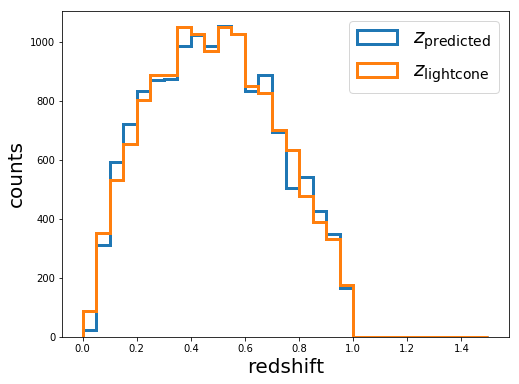

In [27]:
# distribution of redshifts predicted from the training sample
plt.figure(figsize=(8,6))
plt.hist(z_predict_lc,bins=30,range=(0.,1.5),lw=3,histtype='step',label=r'$z_{\rm{predicted}}$')
plt.hist(output_test_lc,bins=30,range=(0.,1.5),lw=3,histtype='step',label=r'$z_{\rm{lightcone}}$')
plt.xlabel('redshift',fontsize=20)
plt.ylabel('counts',fontsize=20)
plt.legend(fontsize=20)
plt.show()

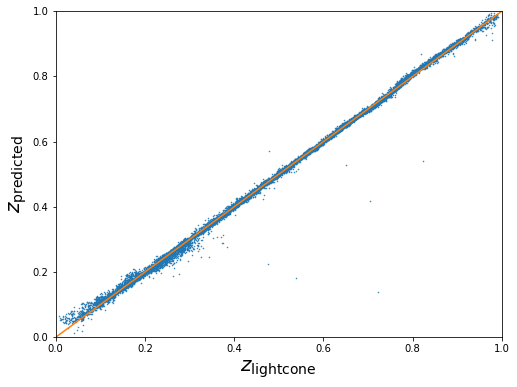

In [28]:
plt.figure(figsize=(8,6))
plt.plot(output_test_lc,z_predict_lc,".",markersize=1)
plt.plot([0.,2.],[0.,2.])
plt.xlim(0.,1.)
plt.ylim(0.,1.)
plt.xlabel(r'$z_{\rm{lightcone}}$',fontsize=20)
plt.ylabel(r'$z_{\rm{predicted}}$',fontsize=20)
plt.show()

## Predict the entire sample (both training and test sample)

In [30]:
z_predict_lc_all = model_lc.predict(input_mags_norm_NB)

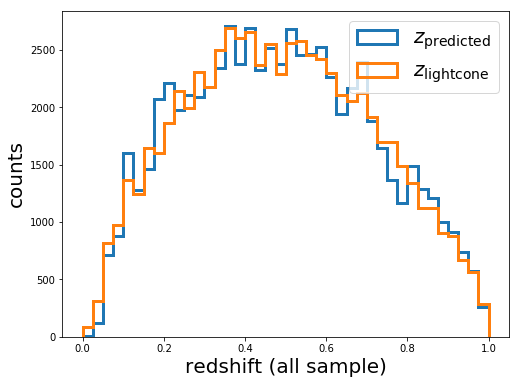

In [31]:
# distribution of redshifts predicted for the entire sample
plt.figure(figsize=(8,6))
plt.hist(z_predict_lc_all,bins=40,range=(0.,1.),label=r'$z_{\rm{predicted}}$',lw=3,histtype='step')
plt.hist(output_z,bins=40,range=(0.,1.),label=r'$z_{\rm{lightcone}}$',lw=3,histtype='step')
plt.xlabel('redshift (all sample)',fontsize=20)
plt.ylabel('counts',fontsize=20)
plt.legend(fontsize=20)
plt.show()

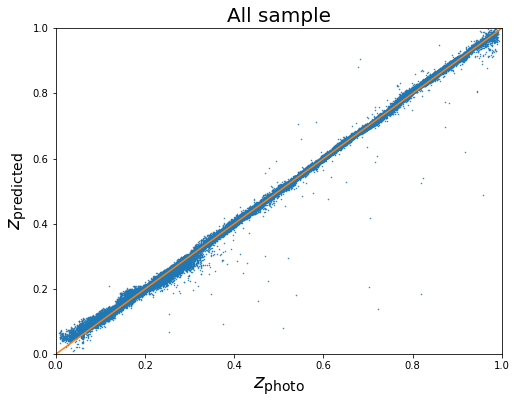

In [32]:
plt.figure(figsize=(8,6))
plt.plot(output_z,z_predict_lc_all,".",markersize=1)
plt.plot([0.,2.],[0.,2.])
plt.xlim(0.,1.)
plt.ylim(0.,1.)
plt.xlabel(r'$z_{\rm{photo}}$',fontsize=20)
plt.ylabel(r'$z_{\rm{predicted}}$',fontsize=20)
plt.title('All sample',fontsize=20)
plt.show()

# Real PAUS data

In [33]:
cosmos_939 = pd.read_csv('/data/dega2/dc-manz2/PAU/data/photoz_939.csv')

In [34]:
#cosmos_939

In [35]:
cosmos_939.columns.values

array(['Unnamed: 0', 'production_id', 'ref_id', 'zb', 'odds', 'pz_width',
       'zb_mean', 'chi2', 'n_band', 'ebv', 'qz', 'best_run', 'id',
       'input_production_id', 'pipeline', 'release', 'software_version',
       'job_id', 'comments', 'created', 'production_id.1', 'ref_id.1',
       'band', 'flux', 'flux_error', 'chi2.1', 'n_coadd', 'run',
       'paudm_id', 'ra', 'dec', 'zp_gal', 'zl68_gal', 'zu68_gal',
       'zl99_gal', 'zu99_gal', 'zp_sec', 'dchi', 'Imag', 'eI', 'I_auto',
       'NbFilt', 'mod_gal', 'type', 'Umag', 'Bmag', 'Vmag', 'Gmag',
       'Rmag', 'Zmag', 'ICmag', 'Jmag', 'Kmag', 'MV', 'ebv_gal',
       'ebv_int', 'acs_a_image', 'acs_b_image', 'acs_theta_image',
       'acs_mag_auto', 'acs_magerr_auto', 'zspec', 'conf', 'F814W',
       'zfits', 'r50', 'sersic_n_gim2d'], dtype=object)

In [36]:
pau_nb = np.unique(cosmos_939['band'])

In [37]:
#print(pau_nb)

In [38]:
df = cosmos_939[['ref_id','zb','zspec','band','flux','Gmag','Imag','Rmag','Umag','Zmag']]

In [39]:
sparse_df = df.set_index(['ref_id', 'band']).unstack()

In [40]:
# in principle zb should be the same in the sparse table for every NB filter but apparently there are some NaN
sparse_df['zb']

band,NB455,NB465,NB475,NB485,NB495,NB505,NB515,NB525,NB535,NB545,...,NB755,NB765,NB775,NB785,NB795,NB805,NB815,NB825,NB835,NB845
ref_id,,,,,,,,,,,,,,,,,,,,,
4,0.587,0.587,0.587,0.587,0.587,0.587,0.587,0.587,0.587,0.587,...,0.587,0.587,0.587,0.587,0.587,0.587,0.587,0.587,0.587,0.587
5,0.847,0.847,0.847,0.847,0.847,0.847,0.847,0.847,0.847,0.847,...,0.847,0.847,0.847,0.847,0.847,0.847,0.847,0.847,0.847,0.847
10,0.024,0.024,0.024,0.024,0.024,0.024,0.024,0.024,0.024,0.024,...,0.024,0.024,0.024,0.024,0.024,0.024,0.024,0.024,0.024,0.024
11,0.971,0.971,0.971,0.971,0.971,0.971,0.971,0.971,0.971,0.971,...,0.971,0.971,0.971,0.971,0.971,0.971,0.971,0.971,0.971,0.971
14,0.864,0.864,0.864,0.864,0.864,0.864,0.864,0.864,0.864,0.864,...,0.864,0.864,0.864,0.864,0.864,0.864,0.864,0.864,0.864,0.864
15,NaN,0.202,0.202,0.202,0.202,0.202,0.202,0.202,NaN,0.202,...,0.202,0.202,0.202,0.202,0.202,0.202,0.202,0.202,0.202,0.202
19,NaN,NaN,1.200,1.200,1.200,1.200,1.200,1.200,NaN,NaN,...,NaN,NaN,1.200,1.200,1.200,1.200,1.200,1.200,1.200,NaN
24,NaN,NaN,0.696,0.696,0.696,0.696,0.696,0.696,NaN,NaN,...,NaN,NaN,0.696,0.696,0.696,0.696,0.696,0.696,NaN,NaN
27,NaN,NaN,0.647,0.647,0.647,0.647,0.647,0.647,NaN,NaN,...,NaN,NaN,0.647,0.647,0.647,0.647,0.647,0.647,NaN,NaN


In [51]:
pau_flux = []
pau_mags = []
for i in range(len(pau_nb)):
    pau_flux.append(np.array(sparse_df['flux'][pau_nb[i]]))
    pau_mags.append(np.array(-2.5*np.log10(sparse_df['flux'][pau_nb[i]])+26))
#pau_mags.append(sparse_df['Gmag']['NB525']) # the NB is random (all of them have the same broad band value)
#pau_mags.append(sparse_df['Imag']['NB525'])
#pau_mags.append(sparse_df['Rmag']['NB525'])
#pau_mags.append(sparse_df['Umag']['NB525'])
#pau_mags.append(sparse_df['Zmag']['NB525'])
pau_flux= np.array(pau_flux).T
pau_mags= np.array(pau_mags).T

/cosma/local/pythonconda3/4.5.4/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


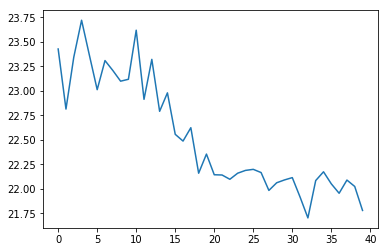

In [50]:
# (conversion for PAU fluxes)
# flux in erg/cm2/sec --> mag_AB 
plt.plot(-2.5*np.log10(pau_flux[0])+26)

In [59]:
#pdcosmos = pd.DataFrame(pau_mags)
#pdcosmos_numbers = pdcosmos.dropna()
#npcosmos = np.array(pdcosmos_numbers)


# I pass on pandas in order to use pd.dropna()
pdcosmos_NB = pd.DataFrame(pau_mags)
# add column with zspec (I need this because otherwise 
# I have a different number of output when I remove the bad values)

pdcosmos_NB['spectroscopic_redshift'] = np.array(sparse_df['zspec']['NB525'])
#pdcosmos_NB['photometric_redshift'] = sparse_df['zb']['NB525']

#remove rows with bad values
pdcosmos_NB_numbers = pdcosmos_NB.dropna()

#I remove spectroscopic redshift == zero as well 
pdcosmos_NB_numbers = pdcosmos_NB_numbers[pdcosmos_NB_numbers.spectroscopic_redshift != 0]
#pdcosmos_NB_numbers = pdcosmos_NB_numbers[pdcosmos_NB_numbers.photometric_redshift != 0]

#output for the training of the NN
zspec_cosmos = pdcosmos_NB_numbers['spectroscopic_redshift']
#zphot_cosmos = pdcosmos_NB_numbers['photometric_redshift']


#input for the training of the NN
npcosmos_NB = np.array(pdcosmos_NB_numbers.drop(['spectroscopic_redshift'],axis=1))
#npcosmos_NB = np.array(pdcosmos_NB_numbers.drop(['photometric_redshift'],axis=1))

In [60]:
#normalise pau mags 
#imp = Imputer(strategy="mean", axis=0)
scaler = StandardScaler()
scaler.fit(npcosmos_NB)#[np.where(not(np.isnan(pau_mags)))])
pau_mags_norm = scaler.transform(npcosmos_NB)

In [61]:
# THE INPUT IS READY!!!!!!!!!!!!!! 

In [62]:
z_predict_lc_cosmos = model_lc.predict(pau_mags_norm)

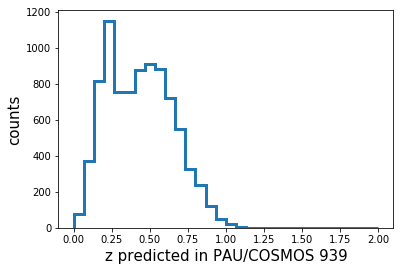

In [63]:
plt.hist(z_predict_lc_cosmos,bins=30,histtype='step',lw=3,range=(-0.,2.))
plt.xlabel(r'z predicted in PAU/COSMOS 939',fontsize=15)
plt.ylabel('counts',fontsize=15)
plt.show()

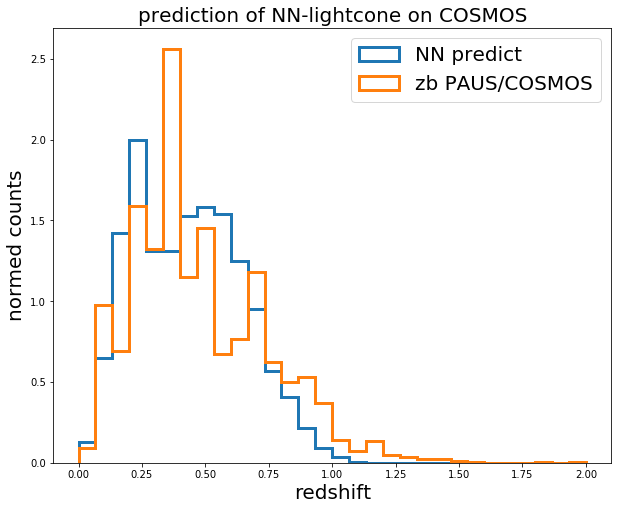

In [64]:
plt.figure(figsize=(10,8))
plt.hist(z_predict_lc_cosmos,bins=30,range=(0.,2.),histtype='step',lw=3,density=True,label=('NN predict'))
plt.hist(zspec_cosmos,bins=30,range=(0.,2.),histtype='step',lw=3,density=True,label='zb PAUS/COSMOS')
plt.legend(fontsize=20)
plt.title('prediction of NN-lightcone on COSMOS',fontsize=20)
plt.xlabel('redshift',fontsize=20)
plt.ylabel('normed counts',fontsize=20)
plt.show()

In [108]:
#np.where(np.isnan(sparse_df['zb']['NB545']))

In [109]:
#np.where(np.isnan(df['zb']))

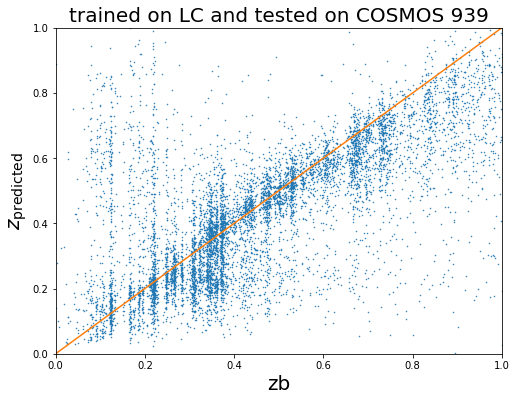

In [68]:
plt.figure(figsize=(8,6))
plt.plot(zspec_cosmos,z_predict_lc_cosmos,".",markersize=1)
plt.plot([0.,2.],[0.,2.])
plt.xlim(0.,1.)
plt.ylim(0.,1.)
plt.xlabel(r'zb',fontsize=20)
plt.ylabel(r'$z_{\rm{predicted}}$',fontsize=20)
plt.title('trained on LC and tested on COSMOS 939',fontsize=20)
plt.show()

# W3 testing

In [92]:
w3_867 = pd.read_csv('/data/dega2/dc-manz2/PAU/data/photo_z_867_lensW3_iy24.csv')

In [93]:
df_w3 = w3_867[['paudm_id','zb','band','flux','mag_g','mag_i','mag_r','mag_u','mag_z']]

In [94]:
sparse_df_w3 = df_w3.set_index(['paudm_id', 'band']).unstack()

In [95]:
pau_flux_w3 = []
pau_mags_w3 = []

for i in range(len(pau_nb)):
    pau_flux_w3.append(np.array(sparse_df_w3['flux'][pau_nb[i]]))
    pau_mags_w3.append(np.array(-2.5*np.log10(sparse_df_w3['flux'][pau_nb[i]])+26))
    
# I DO NOT WANT THE BROADBAND ANYMORE
## the selected NB (NB525) is random (all of them have the same broad band value)
#pau_mags_w3.append(sparse_df_w3['mag_g']['NB525']) 
#pau_mags_w3.append(sparse_df_w3['mag_i']['NB525'])
#pau_mags_w3.append(sparse_df_w3['mag_r']['NB525'])
#pau_mags_w3.append(sparse_df_w3['mag_u']['NB525'])
#pau_mags_w3.append(sparse_df_w3['mag_z']['NB525'])

pau_flux_w3= np.array(pau_flux_w3).T
pau_mags_w3= np.array(pau_mags_w3).T

/cosma/local/pythonconda3/4.5.4/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


In [96]:
#pdw3 = pd.DataFrame(pau_mags_w3)
#pdw3_numbers = pdw3.dropna()
#npw3 = np.array(pdw3_numbers)

# I pass on pandas in order to use pd.dropna()
pdw3 = pd.DataFrame(pau_mags_w3)
# add column with zspec (I need this because otherwise 
# I have a different number of output when I remove the bad values)

pdw3['photometric_redshift'] = np.array(sparse_df_w3['zb']['NB525'])
#pdcosmos_NB['photometric_redshift'] = sparse_df['zb']['NB525']

#remove rows with bad values
pdw3_numbers = pdw3.dropna()

#I remove spectroscopic redshift == zero as well 
pdw3_numbers = pdw3_numbers[pdw3_numbers.photometric_redshift != 0]
#pdcosmos_NB_numbers = pdcosmos_NB_numbers[pdcosmos_NB_numbers.photometric_redshift != 0]

#output for the training of the NN
zphot_w3 = pdw3_numbers['photometric_redshift']
#zphot_cosmos = pdcosmos_NB_numbers['photometric_redshift']


#input for the training of the NN
npw3 = np.array(pdw3_numbers.drop(['photometric_redshift'],axis=1))
#npcosmos_NB = np.array(pdcosmos_NB_numbers.drop(['photometric_redshift'],axis=1))


In [97]:
#normalise pau mags 
#imp = Imputer(strategy="mean", axis=0)
scaler = StandardScaler()
scaler.fit(npw3)#[np.where(not(np.isnan(pau_mags)))])
pau_mags_w3_norm = scaler.transform(npw3)

In [102]:
z_predict_lc_w3 = model_lc.predict(pau_mags_w3_norm)

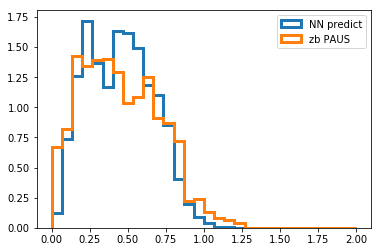

In [103]:
plt.hist(z_predict_lc_w3,bins=30,range=(0.,2.),histtype='step',lw=3,density=True,label=('NN predict'))
plt.hist(zphot_w3,bins=30,range=(0.,2.),histtype='step',lw=3,density=True,label='zb PAUS')
plt.legend()
plt.show()

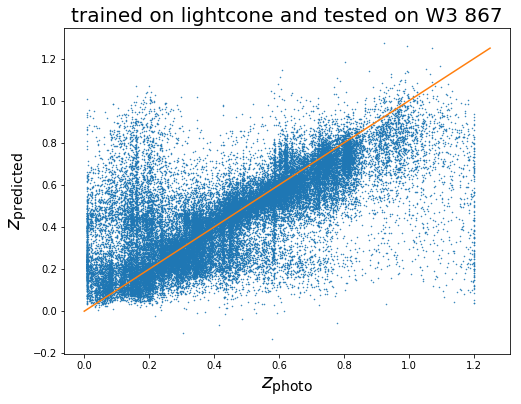

In [106]:
plt.figure(figsize=(8,6))
plt.plot(zphot_w3,z_predict_lc_w3,".",markersize=1)
plt.plot([0.,1.25],[0.,1.25])
#plt.xlim(0.,1.)
#plt.xlim(0.,1.25)
#plt.ylim(-10,10)
#plt.ylim(0.,1.)
plt.xlabel(r'$z_{\rm{photo}}$',fontsize=20)
plt.ylabel(r'$z_{\rm{predicted}}$',fontsize=20)
plt.title('trained on lightcone and tested on W3 867',fontsize=20)
plt.show()

In [46]:
#a = pd.DataFrame(pau_mags)
#b = a.dropna()
#c = np.array(b)

# Train on COSMOS (using just Narrow bands)

Preparing the input

In [11]:
cosmos_939 = pd.read_csv('/data/dega2/dc-manz2/PAU/data/photoz_939.csv')

In [12]:
pau_nb = np.unique(cosmos_939['band'])
print(pau_nb)

['NB455' 'NB465' 'NB475' 'NB485' 'NB495' 'NB505' 'NB515' 'NB525' 'NB535'
 'NB545' 'NB555' 'NB565' 'NB575' 'NB585' 'NB595' 'NB605' 'NB615' 'NB625'
 'NB635' 'NB645' 'NB655' 'NB665' 'NB675' 'NB685' 'NB695' 'NB705' 'NB715'
 'NB725' 'NB735' 'NB745' 'NB755' 'NB765' 'NB775' 'NB785' 'NB795' 'NB805'
 'NB815' 'NB825' 'NB835' 'NB845']


In [13]:
df = cosmos_939[['ref_id','zb','zspec','band','flux','Gmag','Imag','Rmag','Umag','Zmag']]

In [14]:
sparse_df = df.set_index(['ref_id', 'band']).unstack()

In [109]:
pau_flux_NB = []
pau_mags_NB = []
for i in range(len(pau_nb)):
    pau_flux_NB.append(np.array(sparse_df['flux'][pau_nb[i]]))
    pau_mags_NB.append(np.array(-2.5*np.log10(sparse_df['flux'][pau_nb[i]])+26))
pau_flux_NB= np.array(pau_flux_NB).T
pau_mags_NB= np.array(pau_mags_NB).T

/cosma/local/pythonconda3/4.5.4/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


In [110]:
np.shape(pau_mags_NB)

(53758, 40)

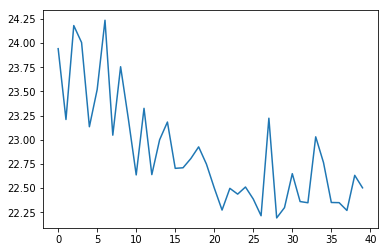

In [111]:
plt.plot(pau_mags_NB[23])

$\textbf{INPUT/OUTPUT}$

In [112]:
# I pass on pandas in order to use pd.dropna()
pdcosmos_NB = pd.DataFrame(pau_mags_NB)
# add column with zspec (I need this because otherwise 
# I have a different number of output when I remove the bad values)

pdcosmos_NB['spectroscopic_redshift'] = np.array(sparse_df['zspec']['NB525'])
#pdcosmos_NB['photometric_redshift'] = sparse_df['zb']['NB525']

#remove rows with bad values
pdcosmos_NB_numbers = pdcosmos_NB.dropna()

#I remove spectroscopic redshift == zero as well 
pdcosmos_NB_numbers = pdcosmos_NB_numbers[pdcosmos_NB_numbers.spectroscopic_redshift != 0]
#pdcosmos_NB_numbers = pdcosmos_NB_numbers[pdcosmos_NB_numbers.photometric_redshift != 0]

#output for the training of the NN
zspec_cosmos = pdcosmos_NB_numbers['spectroscopic_redshift']
#zphot_cosmos = pdcosmos_NB_numbers['photometric_redshift']


#input for the training of the NN
npcosmos_NB = np.array(pdcosmos_NB_numbers.drop(['spectroscopic_redshift'],axis=1))
#npcosmos_NB = np.array(pdcosmos_NB_numbers.drop(['photometric_redshift'],axis=1))

In [113]:
#pdcosmos_NB_numbers['spectroscopic_redshift']

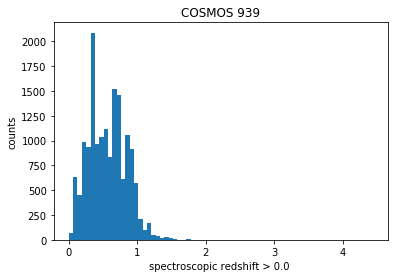

In [114]:
# spectroscopic redshift from COSMOS
plt.hist(sparse_df['zspec']['NB525'][sparse_df['zspec']['NB525']>0],bins=70)
plt.xlabel('spectroscopic redshift > 0.0 ')
plt.ylabel('counts')
plt.title('COSMOS 939')
plt.show()

In [115]:
print('(# good rows, # of filters) = ',np.shape(npcosmos_NB))

(# good rows, # of filters) =  (8643, 40)


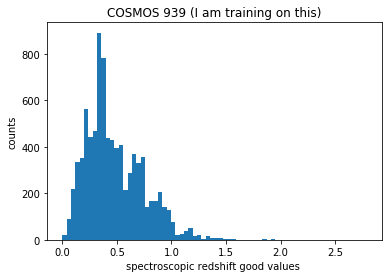

In [116]:
plt.hist(zspec_cosmos,bins=70)
plt.xlabel('spectroscopic redshift good values ')
plt.ylabel('counts')
plt.title('COSMOS 939 (I am training on this)')
plt.show()

In [117]:
print('# of zero values = ',len(np.where(zspec_cosmos==0.0)[0]), '(because I removed them hihih)')

# of zero values =  0 (because I removed them hihih)


might be worth removing the zeros as the NN predict just zeros if I use them

In [118]:
#plt.hist(zphot_cosmos,bins=70)
#plt.xlabel('photometric redshift good values ')
#plt.ylabel('counts')
#plt.title('COSMOS 939 (I am training on this)')
#plt.show()

In [119]:
#print('# of zero values = ',len(np.where(zphot_cosmos==0.0)[0]), '(because I removed them hihih)')

## Create NN trained on COSMOS

Normalise the sample

In [120]:
#npcosmos_NB

In [121]:
scaler = StandardScaler()
scaler.fit(npcosmos_NB)
npcosmos_NB_norm = scaler.transform(npcosmos_NB)


# IF YOU DO NOT WANT TO NORMALISE:
#npcosmos_NB_norm = npcosmos_NB

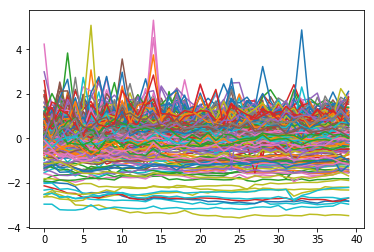

In [122]:
for i in range(300,500):
    plt.plot(npcosmos_NB_norm[i])
plt.show()

Split the sample

In [123]:
input_train_c, input_test_c, output_train_c, output_test_c = train_test_split(npcosmos_NB_norm, zspec_cosmos, test_size=0.2)



In [124]:
np.shape(input_train_c)

(6914, 40)

In [125]:
model_cosmos = Sequential()
#create a network with 3 layers (we don't count the input one)
# in the input layer we choose a number of neurons (45) greater than the number of variables (40)
# remember to change the  number of variable if you change the input columns
model_cosmos.add(Dense(50,input_dim=40,activation='relu'))
model_cosmos.add(Dense(30,activation='relu'))
model_cosmos.add(Dense(20,activation='relu'))
model_cosmos.add(Dense(10,activation='relu'))
model_cosmos.add(Dense(5,activation='relu'))
# it's important to choose a linear activation function for the output layer
# as we are trying to predict real numbers and we are not classifying objects
model_cosmos.add(Dense(1,activation='linear'))

In [126]:
#compiling the model before running it
model_cosmos.compile(loss='mean_absolute_error', optimizer='adam')

In [127]:
model_cosmos.fit(input_train_c,output_train_c,epochs=30,batch_size=10)

Epoch 1/30
6914/6914 [==============================] - 2s 252us/step - loss: 0.1387
Epoch 2/30
6914/6914 [==============================] - 1s 213us/step - loss: 0.1107
Epoch 3/30
6914/6914 [==============================] - 2s 220us/step - loss: 0.1028
Epoch 4/30
6914/6914 [==============================] - 2s 228us/step - loss: 0.0962
Epoch 5/30
6914/6914 [==============================] - 2s 231us/step - loss: 0.0932
Epoch 6/30
6914/6914 [==============================] - 2s 233us/step - loss: 0.0905
Epoch 7/30
6914/6914 [==============================] - 2s 227us/step - loss: 0.0876
Epoch 8/30
6914/6914 [==============================] - 2s 231us/step - loss: 0.0876
Epoch 9/30
6914/6914 [==============================] - 2s 229us/step - loss: 0.0859
Epoch 10/30
6914/6914 [==============================] - 2s 236us/step - loss: 0.0851
Epoch 11/30
6914/6914 [==============================] - 2s 221us/step - loss: 0.0828
Epoch 12/30
6914/6914 [==============================] - 1s 217

In [128]:
z_NN_cosmos = model_cosmos.predict(input_test_c)

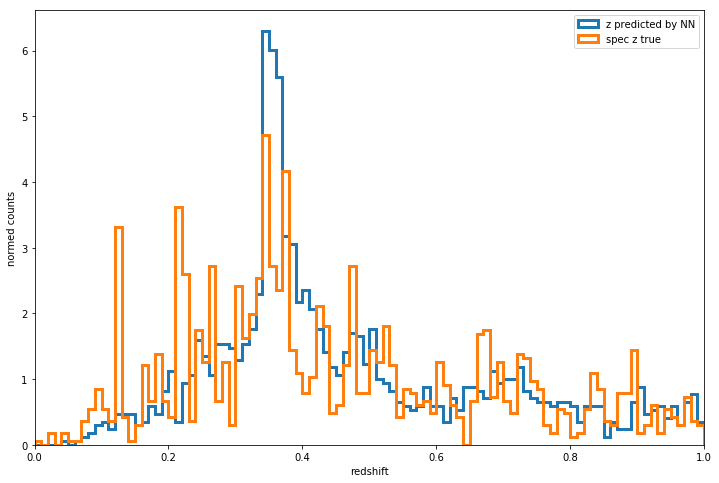

In [129]:
plt.figure(figsize=(12,8))
plt.hist(z_NN_cosmos,bins=100,lw=3,histtype='step',density=True,label='z predicted by NN',range=(0.,1.))#,range=(0.54,0.56))
plt.hist(output_test_c,bins=100,lw=3,histtype='step',density=True,label='spec z true',range=(0.,1.))
#plt.xlim(0.54,0.56)
plt.xlim(0.,1.)
plt.legend()
plt.xlabel('redshift')
plt.ylabel('normed counts')
plt.show()

In [130]:
z_NN_cosmos.min(),z_NN_cosmos.max()

(0.04828389, 1.2665325)

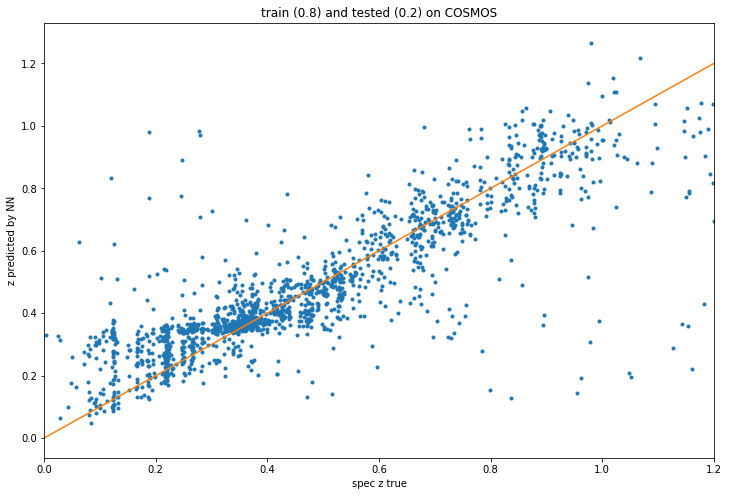

In [131]:
plt.figure(figsize=(12,8))
plt.plot(output_test_c,z_NN_cosmos,".")
plt.plot([0.,1.2],[0.,1.2])
plt.xlim(0.,1.2)
plt.ylabel('z predicted by NN')
plt.xlabel('spec z true')
plt.title('train (0.8) and tested (0.2) on COSMOS')
plt.show()

In [132]:
# try to remove the zeros!!
# try to change the NN
# try to use zb instead of z_spec
# plot a random spectrum just to check
# try not to normalise

In [133]:
pau_mags_NB

array([[23.42604346, 22.81346249, 23.34238003, ..., 22.0897795 ,
        22.02452608, 21.7801414 ],
       [24.77858091, 23.02573394, 24.44150975, ..., 23.12475986,
        22.8658979 , 23.31495307],
       [24.81690682, 24.37236737, 24.42850665, ..., 23.32646807,
        23.97055325, 24.08412406],
       ...,
       [23.31227368, 23.54033577, 24.10940655, ..., 23.09694696,
        24.43649763, 23.05488979],
       [24.17756821,         nan, 24.08835127, ..., 22.07586601,
        22.06256184, 21.80112366],
       [23.5105688 , 24.49166264, 24.6083514 , ..., 21.84911244,
        21.94313644, 22.0391267 ]])

In [134]:
# you need to creat it first...
z_NNw3_c = model_w3.predict(npcosmos_NB_norm)

NameError: name 'model_w3' is not defined

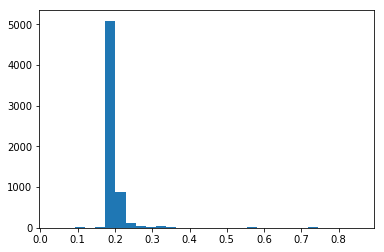

In [210]:
plt.hist(z_NNw3_c,bins=30)
plt.show()

I might want to train the network on W3

# Training on W3

In [135]:
w3_867 = pd.read_csv('/data/dega2/dc-manz2/PAU/data/photo_z_867_lensW3_iy24.csv')

In [136]:
w3_867.columns.values

array(['col1_1', 'zb', 'odds_1', 'pz_width', 'zb_mean', 'chi2_1',
       'n_band', 'ebv', 'qz', 'best_run', 'id', 'pipeline', 'release',
       'software_version', 'job_id', 'comments', 'created', 'band',
       'flux', 'flux_error', 'n_coadd', 'run', 'paudm_id', 'alpha_j2000',
       'delta_j2000', 'class_star', 'star_flag', 'mask', 'mag_u', 'mag_g',
       'mag_r', 'mag_i', 'mag_y', 'mag_z', 'magerr_u', 'magerr_g',
       'magerr_r', 'magerr_i', 'magerr_y', 'magerr_z', 'extinction_u',
       'extinction_g', 'extinction_r', 'extinction_i', 'extinction_z',
       'z_b', 'z_b_min', 'z_b_max', 't_b'], dtype=object)

In [137]:
print(w3_867['zb'][50],w3_867['z_b'][50])

0.868 1.07


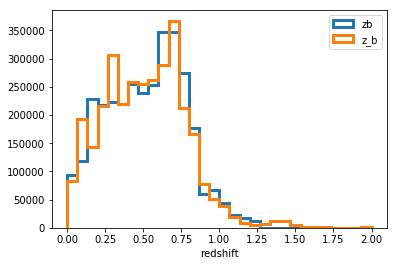

In [138]:
plt.hist(w3_867['zb'],lw=3,histtype='step' ,range=(0.,2.),bins=30,label='zb')
plt.hist(w3_867['z_b'],lw=3,histtype='step',range=(0.,2.),bins=30,label='z_b')
plt.xlabel('redshift')
plt.legend()
plt.show()

In [139]:
#note that we have zb and z_b

df_w3 = w3_867[['paudm_id','zb','band','flux','mag_g','mag_i','mag_r','mag_u','mag_z']]

In [140]:
#(df_w3[df_w3['band']=='NB455']).sort_values(by='paudm_id')
#df_w3.sort_values(by=['paudm_id','band'])
#df_w3.groupby('band').aggregate('paudm_id').count()

In [141]:
sparse_df_w3 = df_w3.set_index(['paudm_id', 'band']).unstack()

In [142]:
pau_nb = np.unique(w3_867['band'])

In [143]:
print(pau_nb)

['NB455' 'NB465' 'NB475' 'NB485' 'NB495' 'NB505' 'NB515' 'NB525' 'NB535'
 'NB545' 'NB555' 'NB565' 'NB575' 'NB585' 'NB595' 'NB605' 'NB615' 'NB625'
 'NB635' 'NB645' 'NB655' 'NB665' 'NB675' 'NB685' 'NB695' 'NB705' 'NB715'
 'NB725' 'NB735' 'NB745' 'NB755' 'NB765' 'NB775' 'NB785' 'NB795' 'NB805'
 'NB815' 'NB825' 'NB835' 'NB845']


In [144]:
pau_mags_w3 = []
for i in range(int(len(pau_nb))):
    # magnitude conversion for PAUS 26-2.5 log10(flux)
    pau_mags_w3.append(np.array(26-2.5*np.log10(sparse_df_w3['flux'][pau_nb[i]])))
pau_mags_w3= np.array(pau_mags_w3).T

/cosma/local/pythonconda3/4.5.4/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


In [145]:
pau_mags_w3

array([[24.6914338 , 24.33322313, 23.99442585, ..., 22.56997201,
        22.66606445, 22.97022395],
       [22.98391359, 23.02829738, 22.95280165, ..., 20.92938546,
        21.0002921 , 20.95872241],
       [22.5352518 , 23.00200439, 23.15328823, ..., 21.85238077,
        21.7097599 , 21.62334146],
       ...,
       [21.76059337, 21.60476883, 21.6700093 , ..., 21.15321797,
        21.0611241 , 21.29233056],
       [22.99965287, 22.92316262, 23.04240223, ..., 21.56931678,
        21.67157008, 21.68383606],
       [21.83168288, 21.32519077, 21.02991654, ..., 19.16247868,
        19.23898447, 19.07678013]])

In [146]:
pdw3 = pd.DataFrame(pau_mags_w3)
pdw3['photometric_redshift'] = np.array(sparse_df_w3['zb']['NB755'])

pdw3_numbers = pdw3.dropna(axis=0)
#pdw3_numbers = pdw3

zphot_w3 = pdw3_numbers['photometric_redshift']


npw3 = np.array(pdw3_numbers.drop(['photometric_redshift'],axis=1))

In [147]:
np.shape(np.array(sparse_df_w3['zb']['NB755']))

(83970,)

In [148]:
np.shape(pdw3['photometric_redshift'])

(83970,)

In [62]:
#pdw3_numbers

In [63]:
#pdw3['photometric_redshift']

In [64]:
#np.shape(pdw3_numbers)

In [65]:
#zphot_w3

In [149]:
scaler = StandardScaler()
scaler.fit(npw3)
npw3_norm = scaler.transform(npw3)

In [150]:

input_train_w3, input_test_w3, output_train_w3, output_test_w3 = train_test_split(npw3_norm, zphot_w3, test_size=0.2)


In [157]:
#for i in range(len(pau_mags_w3)):
#    if np.isnan(pau_mags_w3[i][0]):
#        print(i,pau_mags_w3[i])
#

In [162]:
#w3_867['zb']

In [163]:
#sparse_df_w3['zb']['NB555']

In [165]:
#print(pau_nb)


In [164]:
#sparse_df_w3['flux']['NB845']
#len(np.unique(sparse_df_w3['flux']['NB515']))

In [151]:
model_w3= Sequential()
#create a network with 3 layers (we don't count the input one)
# in the input layer we choose a number of neurons (45) greater than the number of variables (40)
# remember to change the  number of variable if you change the input columns
model_w3.add(Dense(50,input_dim=40,activation='relu'))
model_w3.add(Dense(30,activation='relu'))
model_w3.add(Dense(20,activation='relu'))
model_w3.add(Dense(10,activation='relu'))
model_w3.add(Dense(5,activation='relu'))
# it's important to choose a linear activation function for the output layer
# as we are trying to predict real numbers and we are not classifying objects
model_w3.add(Dense(1,activation='linear'))

In [152]:
model_w3.compile(loss='mean_absolute_error', optimizer='adam')

In [153]:
model_w3.fit(input_train_w3,output_train_w3,epochs=30,batch_size=10)

Epoch 1/30
34697/34697 [==============================] - 9s 248us/step - loss: 0.1168
Epoch 2/30
34697/34697 [==============================] - 8s 233us/step - loss: 0.0966
Epoch 3/30
34697/34697 [==============================] - 9s 246us/step - loss: 0.0924
Epoch 4/30
34697/34697 [==============================] - 9s 263us/step - loss: 0.0902
Epoch 5/30
34697/34697 [==============================] - 8s 241us/step - loss: 0.0884
Epoch 6/30
34697/34697 [==============================] - 8s 237us/step - loss: 0.0869
Epoch 7/30
34697/34697 [==============================] - 9s 252us/step - loss: 0.0867
Epoch 8/30
34697/34697 [==============================] - 9s 258us/step - loss: 0.0851
Epoch 9/30
34697/34697 [==============================] - 8s 234us/step - loss: 0.0845
Epoch 10/30
34697/34697 [==============================] - 8s 232us/step - loss: 0.0841
Epoch 11/30
34697/34697 [==============================] - 8s 235us/step - loss: 0.0834
Epoch 12/30
34697/34697 [================

In [170]:
z_NN_w3 = model_w3.predict(input_test)

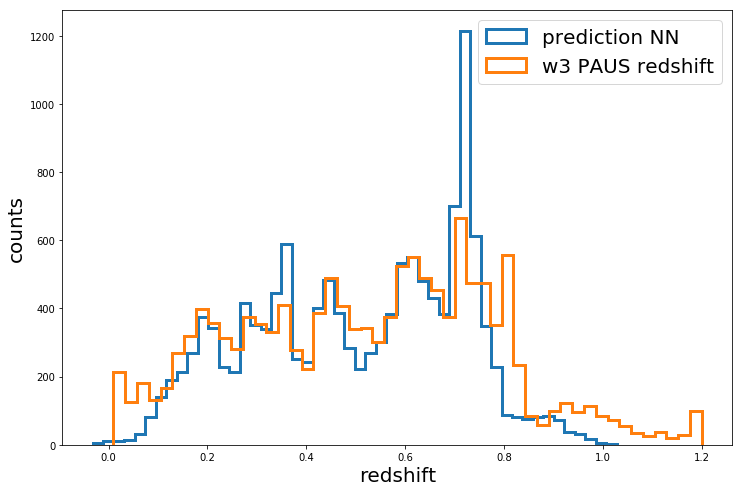

In [221]:
plt.figure(figsize=(12,8))
plt.hist(z_NN_w3,bins=50    ,histtype='step',lw=3,label='prediction NN')
plt.hist(output_test,bins=50,histtype='step',lw=3,label='w3 PAUS redshift')
plt.xlabel('redshift',fontsize=20)
plt.ylabel('counts',fontsize=20)
plt.legend(fontsize=20)
plt.show()

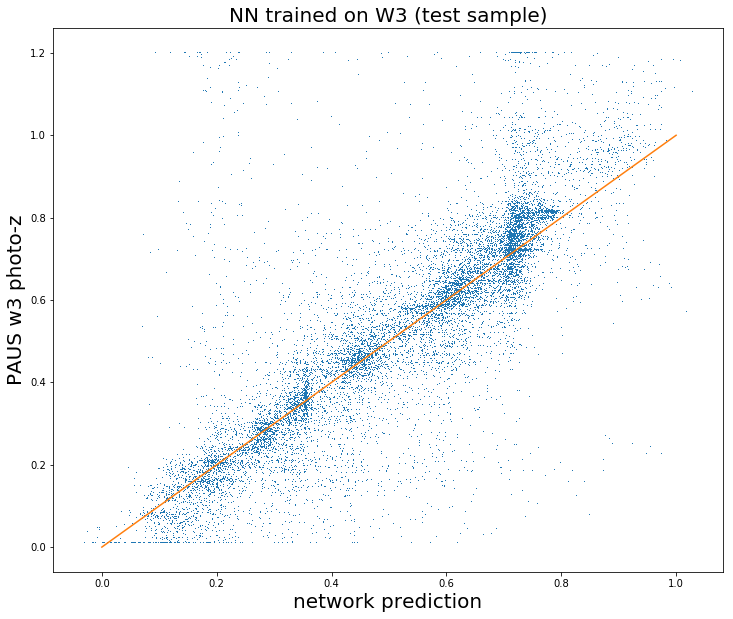

In [215]:
plt.figure(figsize=(12,10))
plt.plot(z_NN_w3,output_test,",")
plt.plot([0.,1.],[0.,1.])
plt.xlabel('network prediction',fontsize=20)
plt.ylabel('PAUS w3 photo-z',fontsize=20)
plt.title('NN trained on W3 (test sample)',fontsize=20)
plt.show()

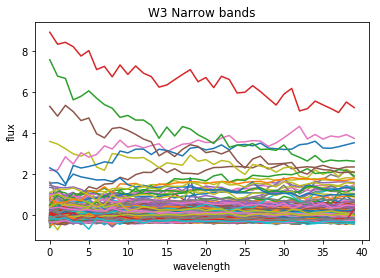

In [225]:
for i in range(300):
    plt.plot(npw3_norm[i])
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.title('W3 Narrow bands')
plt.show()

In [71]:
z_NNcosmos_w3 = model_cosmos.predict(npw3_norm)

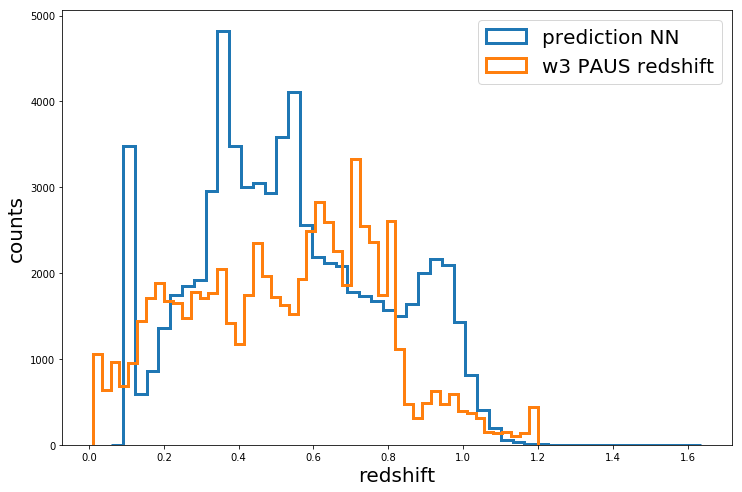

In [72]:
plt.figure(figsize=(12,8))
plt.hist(z_NNcosmos_w3,bins=50    ,histtype='step',lw=3,label='prediction NN')
#plt.hist(output_test_w3,bins=50,histtype='step',lw=3,label='w3 PAUS redshift')
plt.hist(zphot_w3,bins=50,histtype='step',lw=3,label='w3 PAUS redshift') # ALL SAMPLE W3
plt.xlabel('redshift',fontsize=20)
plt.ylabel('counts',fontsize=20)
plt.legend(fontsize=20)
plt.show()

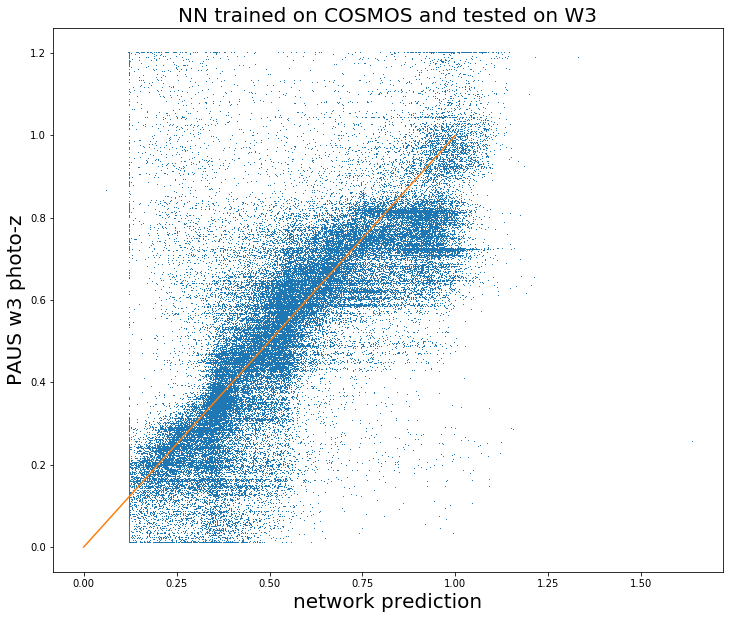

In [74]:
plt.figure(figsize=(12,10))
plt.plot(z_NNcosmos_w3,zphot_w3,",")
plt.plot([0.,1.],[0.,1.])
plt.xlabel('network prediction',fontsize=20)
plt.ylabel('PAUS w3 photo-z',fontsize=20)
plt.title('NN trained on COSMOS and tested on W3',fontsize=20)
plt.show()

# Test cosmos training on the lightcone

In [154]:
z_NNcosmos_lightcone = model_cosmos.predict(input_mags_norm_NB)

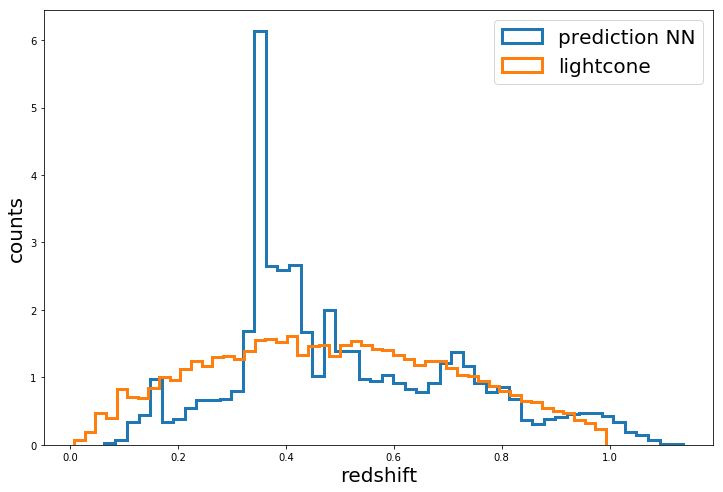

In [156]:
plt.figure(figsize=(12,8))
plt.hist(z_NNcosmos_lightcone,bins=50    ,histtype='step',lw=3,label='prediction NN',density=True)
#plt.hist(output_test_w3,bins=50,histtype='step',lw=3,label='w3 PAUS redshift')
plt.hist(output_z,bins=50,histtype='step',lw=3,label='lightcone',density=True) # ALL SAMPLE W3
plt.xlabel('redshift',fontsize=20)
plt.ylabel('counts',fontsize=20)
plt.legend(fontsize=20)
plt.show()

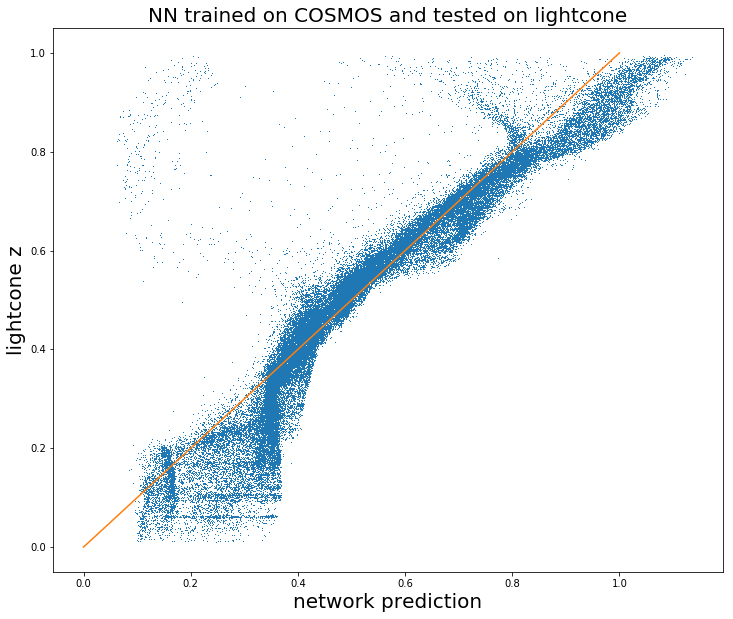

In [157]:
plt.figure(figsize=(12,10))
plt.plot(z_NNcosmos_lightcone,output_z,",")
plt.plot([0.,1.],[0.,1.])
plt.xlabel('network prediction',fontsize=20)
plt.ylabel('lightcone z',fontsize=20)
plt.title('NN trained on COSMOS and tested on lightcone',fontsize=20)
plt.show()